In [2]:
import os
%pwd

'/home/jupyter/crisp/notebooks'

In [3]:
os.chdir("../../crisp/")

In [4]:
import os
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import randint, bernoulli
from sklearn import linear_model
from synthetic.facebook_synthetic_data_generator import generator_example

In [5]:
data_path = 'data/synthetic'
if not os.path.exists(data_path):
    os.makedirs(data_path)

In [6]:
n_example = 6
dim_inv=4
dim_spu=4
n_exp=int(1e3)
n_env=4 
save_dir= data_path
test=False 

In [7]:
generator_example(n_example, dim_inv, dim_spu, n_exp, n_env ,save_dir, test)

Environments variables: {'E0': 0.3, 'E1': 0.7, 'E2': 0.5, 'E3': 0.12406414747238159}
Generated Synthetic Data according to the Facebook setup Example: 6


In [8]:
data_name = "data_fb_example_%s_dim_inv_%s_dim_spu_%s_n_exp_%s_n_env_%s_test_%s.pickle" %(n_example, dim_inv, dim_spu, n_exp, n_env,test)
df_train = pd.read_pickle(os.path.join(data_path, data_name))
# df_test = pd.read_pickle(os.path.join(result_path,"data_fb_example_1_dim_inv_5_dim_spu_5_n_exp_1000000_n_env_2_test_True.pickle"))

In [12]:
df_train.head()

,Causal_0,Causal_1,Causal_2,Causal_3,Non_causal_0,Non_causal_1,Non_causal_2,Non_causal_3,env_split,Subj_ID,Target
0,0.436416,0.527679,0.0,1.0,-0.322185,1.229431,0.0,1.0,0.0,0.0,1.435536
1,0.088922,-0.115168,1.0,0.0,0.756419,1.106043,1.0,1.0,0.0,1.0,-1.058073
2,-0.195877,0.271647,0.0,0.0,0.372583,-0.317994,0.0,1.0,0.0,2.0,0.259324
3,-0.197579,0.102763,0.0,1.0,-1.316211,-0.026109,1.0,1.0,0.0,3.0,-0.381322
4,0.372010,0.760490,1.0,1.0,0.064251,0.083872,0.0,1.0,0.0,4.0,-0.552214


In [17]:
len(df_train[df_train['Causal_1']==0])

0

In [25]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

# Implementing the Crisp Codes

In [40]:
configuration = {
    "name": "Example Experiment for AH casual ensemble",
    "short_name": "ah_experiment_notebook",
    "bucket_project": "fdl-us-astronaut-health",
    "bucket_name": "ah_21_data",
    "bucket_path": "gs://ah_21_data",
    "verbose": 1,
    "test_val_split": [0.1, 0.1],
    "per_variant_experiment": False,
    "data_options": {
        'dataset_fp': os.path.join(data_path, data_name),#'results/synthetic/' + data_name,
        'subject_keys': 'Subj_ID',
        'targets': ['Target'],
        'predictors': 'All',
        'environments': ['env_split'],
        'exclude': ['Subj_ID']
    },
    "feature_selection_options": {
        "max_features": 20,
        "verbose": 0,
        "seed": 12
    },
    "ensemble_options": {
        "models": ["ERM"]#, "RF", "ICP", "IRM", "DCF", "ITE", "LIRM", "NLICP"]
    },
    "use_cloud":False,
    "results_directory": "crisp/results/"
}


In [31]:
from main import run as runcrisp

In [39]:
data_path

'data/synthetic'

Running a per sample experiment
Loaded  2  train environments
Env  0  has  417  samples
X shape  (417, 2)  y shape  (417, 1)
Env  1  has  393  samples
X shape  (393, 2)  y shape  (393, 1)
Loaded val set, X shape: (90, 2)  y shape:  (90, 1)
Loaded test set, X shape: (100, 2)  y shape:  (100, 1)
Running Ensemble with the following models:  ['ERM']
Checking for features with zero variance
Across all environments the following columns had zero variance: []
Running a per sample experiment


/home/jupyter/crisp/utils/CorrelationToTarget.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  all_x = np.array(all_x)
/home/jupyter/crisp/utils/CorrelationToTarget.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  all_y = np.array(all_y)


Loaded  2  train environments
Env  0  has  417  samples
X shape  (417, 2)  y shape  (417, 1)
Env  1  has  393  samples
X shape  (393, 2)  y shape  (393, 1)
Loaded val set, X shape: (90, 2)  y shape:  (90, 1)
Loaded test set, X shape: (100, 2)  y shape:  (100, 1)
Running correlation analysis
Running a per sample experiment
Loaded  2  train environments
Env  0  has  417  samples
X shape  (417, 2)  y shape  (417, 1)
Env  1  has  393  samples
X shape  (393, 2)  y shape  (393, 1)
Loaded val set, X shape: (90, 2)  y shape:  (90, 1)
Loaded test set, X shape: (100, 2)  y shape:  (100, 1)
Running Non-Causal Linear ERM Baseline
{'test_acc': 0.019999999552965164, 'test_nll': 0.2581358850002289, 'test_probs': array([0.41259974, 0.4672413 , 0.53067845, 0.5656113 , 0.43314034,
       0.4228297 , 0.4983057 , 0.58823305, 0.54786706, 0.4194309 ,
       0.30387974, 0.49256197, 0.62536126, 0.5973141 , 0.62037903,
       0.47846603, 0.55186015, 0.47466594, 0.5575868 , 0.5867111 ,
       0.56486225, 0.4496

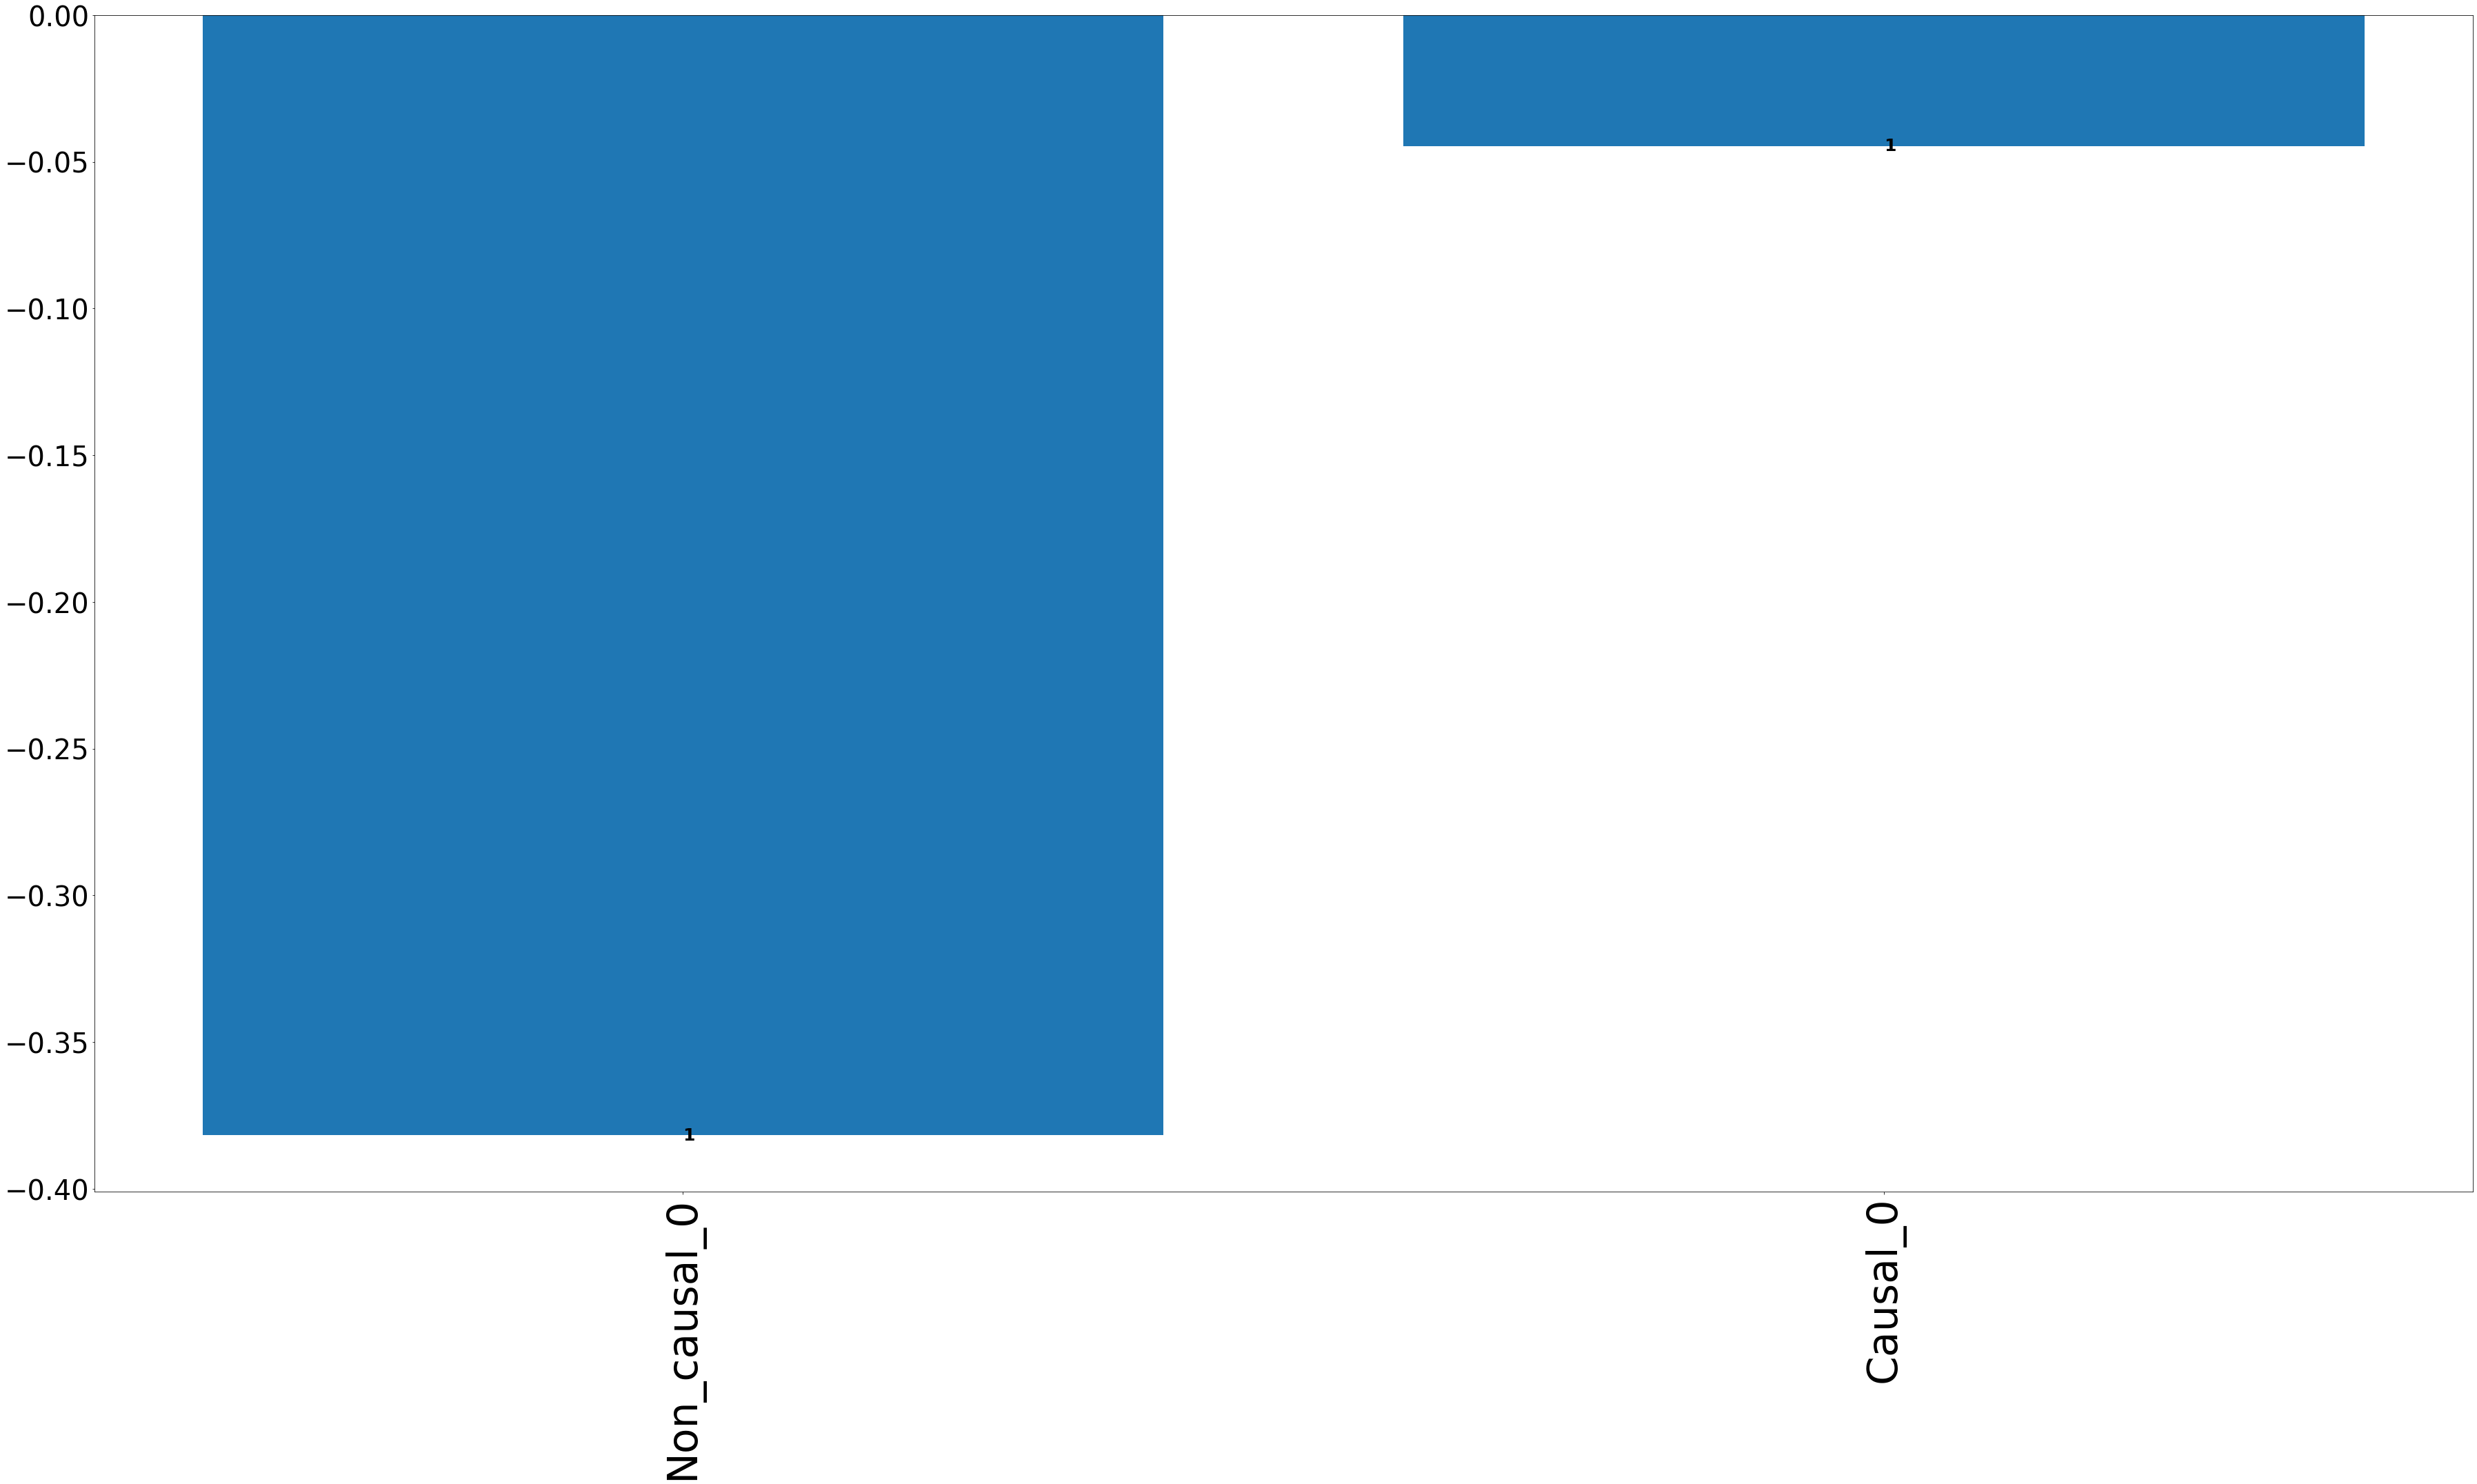

In [41]:
runcrisp(configuration)

# Causal variable: 


Reg cooefs: [1.50949738] -0.010940230485956617


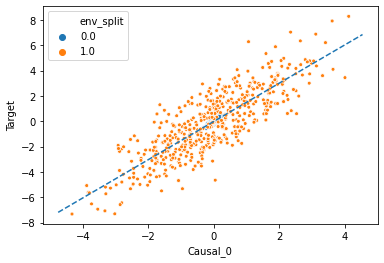

In [10]:
sns.scatterplot(x="Causal_0", y="Target", data=df_train, hue="env_split", s=15)
reg = linear_model.LinearRegression().fit(df_train[['Causal_0']], df_train["Target"])
print("Reg cooefs:", reg.coef_, reg.intercept_)
abline(reg.coef_, reg.intercept_)

## env = 0

Reg cooefs: [1.60684659] 0.002277184872372221


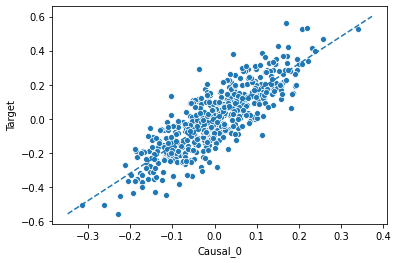

In [11]:
sns.scatterplot(x="Causal_0", y="Target", data=df_train[df_train["env_split"]==0])
reg = linear_model.LinearRegression().fit(df_train[df_train["env_split"]==0][['Causal_0']], df_train[df_train["env_split"]==0]["Target"])
print("Reg cooefs:", reg.coef_, reg.intercept_)
abline(reg.coef_, reg.intercept_)

## env = 1

Reg cooefs: [1.508297] -0.02469241988591586


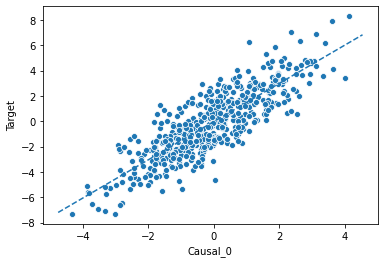

In [12]:
sns.scatterplot(x="Causal_0", y="Target", data=df_train[df_train["env_split"]==1])
reg = linear_model.LinearRegression().fit(df_train[df_train["env_split"]==1][['Causal_0']], df_train[df_train["env_split"]==1]["Target"])
print("Reg cooefs:", reg.coef_, reg.intercept_)
abline(reg.coef_, reg.intercept_)

# Non causal var

Reg cooefs: [-0.77898428] -0.08618886616433315


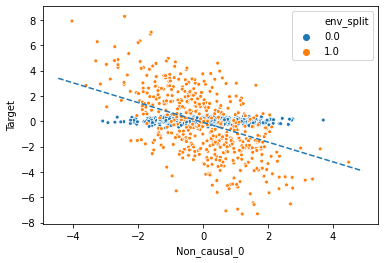

In [13]:
sns.scatterplot(x="Non_causal_0", y="Target", data=df_train, hue="env_split", s=15)
reg = linear_model.LinearRegression().fit(df_train[['Non_causal_0']], df_train["Target"])
print("Reg cooefs:", reg.coef_, reg.intercept_)
abline(reg.coef_, reg.intercept_)


#

Reg cooefs: [-0.00415771] 0.00897351034559709


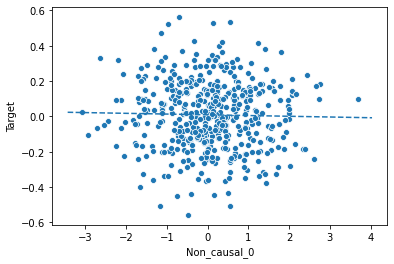

In [14]:
sns.scatterplot(x="Non_causal_0", y="Target", data=df_train[df_train["env_split"]==0])
reg = linear_model.LinearRegression().fit(df_train[df_train["env_split"]==0][['Non_causal_0']], df_train[df_train["env_split"]==0]["Target"])
print("Reg cooefs:", reg.coef_, reg.intercept_)
abline(reg.coef_, reg.intercept_)


## env = 1

Reg cooefs: [-1.28960769] -0.23927604563424387


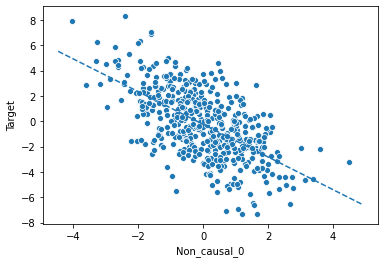

In [15]:
sns.scatterplot(x="Non_causal_0", y="Target", data=df_train[df_train["env_split"]==1])
reg = linear_model.LinearRegression().fit(df_train[df_train["env_split"]==1][['Non_causal_0']], df_train[df_train["env_split"]==1]["Target"])
print("Reg cooefs:", reg.coef_, reg.intercept_)
abline(reg.coef_, reg.intercept_)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd12d799580>,
      dtype=object)

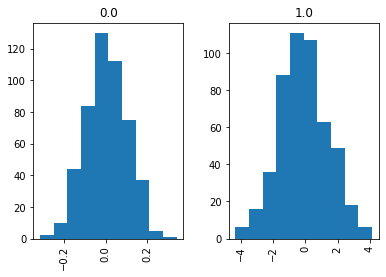

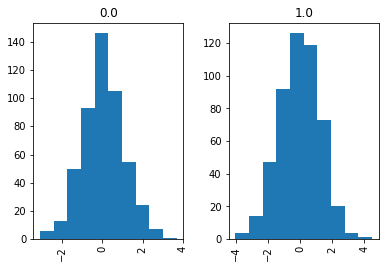

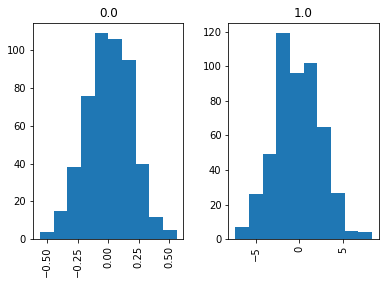

In [16]:
df_train['Causal_0'].hist(by=df_train['env_split'])
df_train['Non_causal_0'].hist(by=df_train['env_split'])
df_train['Target'].hist(by=df_train['env_split'])

## Two dimensional regression